# Class 29: Choosing a Model

1. log onto prismia
1. share your favorite restaraunt on/near campus in the zoom chat

## Portfolio PR

In [1]:
# %load http://drsmb.co/310
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster
from sklearn import svm
from sklearn import tree
from sklearn import model_selection

In [2]:
iris_X, iris_y = datasets.load_iris(return_X_y= True)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = model_selection.train_test_split(iris_X,iris_y)
dt = tree.DecisionTreeClassifier()
params_dt = {'criterion':['gini','entropy'],'max_depth':[2,3,4],
             'min_samples_leaf':list(range(2,20,2))}
dt_opt = model_selection.GridSearchCV(dt,params_dt)
dt_opt.fit(iris_X_train,iris_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

In [3]:
dt_opt.predict(iris_X_test)

array([1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2])

In [4]:
dt_opt.best_estimator_.predict(iris_X_test)

array([1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2])

In [5]:
pd.DataFrame(dt_opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000561,0.000138,0.000276,0.000041,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
1,0.000443,0.000023,0.000238,0.000013,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
2,0.000484,0.000022,0.000266,0.000011,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
3,0.000447,0.000027,0.000239,0.000015,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
4,0.000489,0.000022,0.000255,0.000008,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
5,0.000473,0.000031,0.000244,0.000019,gini,2,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
6,0.000460,0.000031,0.000250,0.000013,gini,2,14,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
7,0.000447,0.000031,0.000249,0.000019,gini,2,16,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
8,0.000477,0.000021,0.000266,0.000032,gini,2,18,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.869565,0.913043,0.909091,0.909091,0.954545,0.911067,0.026924,6
9,0.000475,0.000038,0.000248,0.000021,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869565,0.913043,1.000000,1.000000,0.954545,0.947431,0.050642,1


<AxesSubplot:xlabel='mean_score_time'>

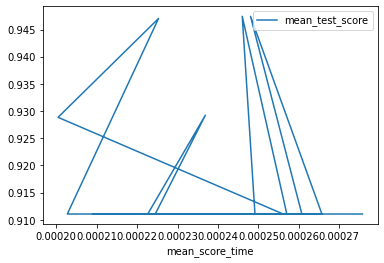

In [6]:
df = pd.DataFrame(dt_opt.cv_results_)
df.plot('mean_score_time','mean_test_score')

In [7]:
%load http://drsmb.co

In [8]:
param_grid = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_clf = svm.SVC(kernel='linear')
svm_opt =model_selection.GridSearchCV(svm_clf,param_grid,)
svm_opt.fit(iris_X_train, iris_y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.5, 1, 10], 'kernel': ['linear', 'rbf']})

<AxesSubplot:xlabel='mean_score_time', ylabel='mean_test_score'>

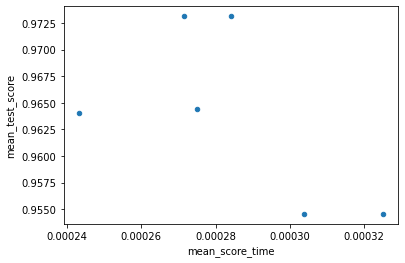

In [9]:
df_svm = pd.DataFrame(svm_opt.cv_results_)
df_svm.plot.scatter('mean_score_time','mean_test_score')

<AxesSubplot:xlabel='mean_score_time', ylabel='std_test_score'>

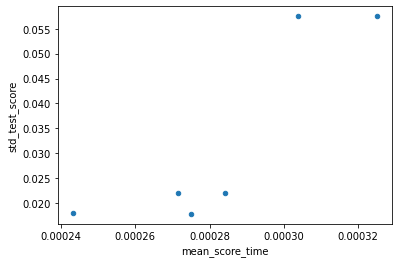

In [10]:
df_svm.plot.scatter('mean_score_time','std_test_score')